<a href="https://colab.research.google.com/github/Houssem23x/Heart_disease/blob/master/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Prepare Problem**

# *a) Load libraries*





In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# *b) Load dataset* 



In [ ]:
opened_file = open('/content/drive/My Drive/Python/heart1.txt')
read_file =  opened_file.read()

#the values of the data set are after @data in heart1.txt
index = read_file.find('@data') 
data = read_file[index+5:].split()
data1 = []

for line in data:
  data1.append(line.split(','))
raw_data = pd.DataFrame(data1)

columns = ['age','sex','chest','resting_blood_pressure','serum_cholestoral',
           'fasting_blood_sugar','resting_electrocardiographic_results',
           'maximum_heart_rate_achieved','exercise_induced_angina','oldpeak',
           'slope','number_of_major_vessels','thal','class']
raw_data.columns = columns

raw_data.head()


,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


In [ ]:
#we need to chnage the type of the attributes 
raw_data.dtypes

age                                     object
sex                                     object
chest                                   object
resting_blood_pressure                  object
serum_cholestoral                       object
fasting_blood_sugar                     object
resting_electrocardiographic_results    object
maximum_heart_rate_achieved             object
exercise_induced_angina                 object
oldpeak                                 object
slope                                   object
number_of_major_vessels                 object
thal                                    object
class                                   object
dtype: object

In [ ]:
int_col = ['age','resting_blood_pressure','serum_cholestoral',
           'maximum_heart_rate_achieved',
           'number_of_major_vessels']
for col in int_col:
  raw_data[col] = raw_data[col].astype(int)

category_col = ['sex','chest','thal','fasting_blood_sugar',
                'exercise_induced_angina','slope',
                'resting_electrocardiographic_results']
for col in category_col:
  raw_data[col] = raw_data[col].astype('category')

raw_data['oldpeak'] = raw_data['oldpeak'].astype(float)

raw_data.dtypes

age                                        int64
sex                                     category
chest                                   category
resting_blood_pressure                     int64
serum_cholestoral                          int64
fasting_blood_sugar                     category
resting_electrocardiographic_results    category
maximum_heart_rate_achieved                int64
exercise_induced_angina                 category
oldpeak                                  float64
slope                                   category
number_of_major_vessels                    int64
thal                                    category
class                                     object
dtype: object

In [ ]:
#converting the target attribute to binary 
raw_data['class'] = raw_data['class'].map({'present':1,'absent':0})
raw_data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
categorical_features = category_col
numerical_features = int_col + ['oldpeak']

# **2. Summarize Data**

# *a) Descriptive statistics*


In [ ]:
pd.set_option('precision',2)
raw_data.describe()


,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,number_of_major_vessels,class
count,270.00,270.00,270.00,270.00,270.00,270.00,270.00
mean,54.43,131.34,249.66,149.68,1.05,0.67,0.44
std,9.11,17.86,51.69,23.17,1.15,0.94,0.50
min,29.00,94.00,126.00,71.00,0.00,0.00,0.00
25%,48.00,120.00,213.00,133.00,0.00,0.00,0.00
50%,55.00,130.00,245.00,153.50,0.80,0.00,0.00
75%,61.00,140.00,280.00,166.00,1.60,1.00,1.00
max,77.00,200.00,564.00,202.00,6.20,3.00,1.00


In [ ]:
raw_data[categorical_features].describe()

,sex,chest,thal,fasting_blood_sugar,exercise_induced_angina,slope,resting_electrocardiographic_results
count,270,270,270,270,270,270,270
unique,2,4,3,2,2,3,3
top,1,4,3,0,0,1,2
freq,183,129,152,230,181,130,137


In [ ]:
for col in categorical_features:
  print(raw_data.groupby(by=col).size().to_frame('count'))
  print('-'*60)

     count
sex       
0       87
1      183
------------------------------------------------------------
       count
chest       
1         20
2         42
3         79
4        129
------------------------------------------------------------
      count
thal       
3       152
6        14
7       104
------------------------------------------------------------
                     count
fasting_blood_sugar       
0                      230
1                       40
------------------------------------------------------------
                         count
exercise_induced_angina       
0                          181
1                           89
------------------------------------------------------------
       count
slope       
1        130
2        122
3         18
------------------------------------------------------------
                                      count
resting_electrocardiographic_results       
0                                       131
1                      

In [ ]:
#Investigating the correlation between the attributes 
raw_data.corr()

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,number_of_major_vessels,class
age,1.00,0.27,0.22,-0.40,0.19,0.36,0.21
resting_blood_pressure,0.27,1.00,0.17,-0.04,0.22,0.09,0.16
serum_cholestoral,0.22,0.17,1.00,-0.02,0.03,0.13,0.12
maximum_heart_rate_achieved,-0.40,-0.04,-0.02,1.00,-0.35,-0.27,-0.42
oldpeak,0.19,0.22,0.03,-0.35,1.00,0.26,0.42
number_of_major_vessels,0.36,0.09,0.13,-0.27,0.26,1.00,0.46
class,0.21,0.16,0.12,-0.42,0.42,0.46,1.00


In [ ]:
#Investigating the target variable
print(raw_data.groupby('class').size().to_frame('count'))

       count
class       
0        150
1        120


In [ ]:
for col in categorical_features:
  print(raw_data.groupby(col)['class'].mean())
  print('-' * 60)

sex
0    0.23
1    0.55
Name: class, dtype: float64
------------------------------------------------------------
chest
1    0.25
2    0.17
3    0.22
4    0.71
Name: class, dtype: float64
------------------------------------------------------------
thal
3    0.22
6    0.57
7    0.76
Name: class, dtype: float64
------------------------------------------------------------
fasting_blood_sugar
0    0.45
1    0.42
Name: class, dtype: float64
------------------------------------------------------------
exercise_induced_angina
0    0.30
1    0.74
Name: class, dtype: float64
------------------------------------------------------------
slope
1    0.25
2    0.64
3    0.56
Name: class, dtype: float64
------------------------------------------------------------
resting_electrocardiographic_results
0    0.35
1    0.50
2    0.53
Name: class, dtype: float64
------------------------------------------------------------


# b) Data visualizations


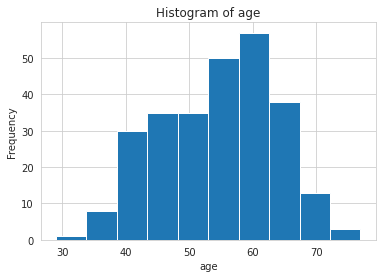

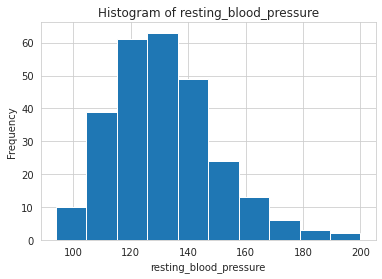

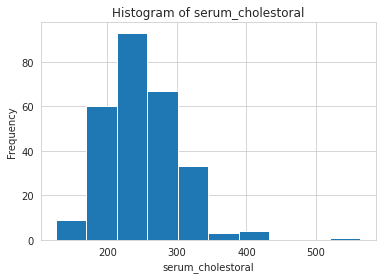

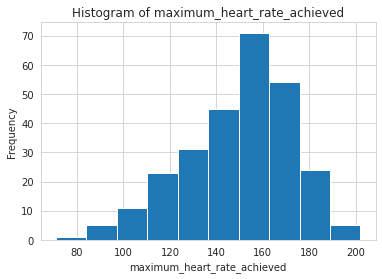

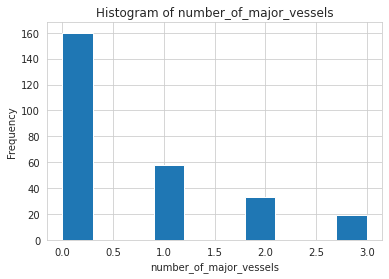

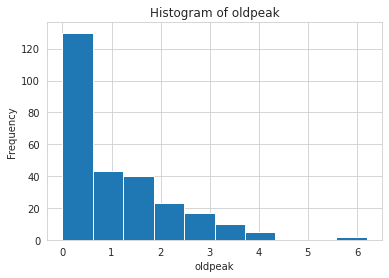

In [ ]:
#Histogram 
for col in numerical_features:
  plt.hist(raw_data[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Histogram of ' + col)
  plt.show()

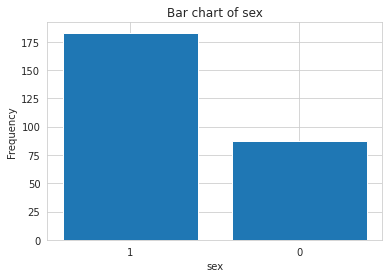

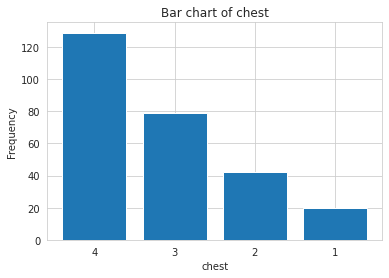

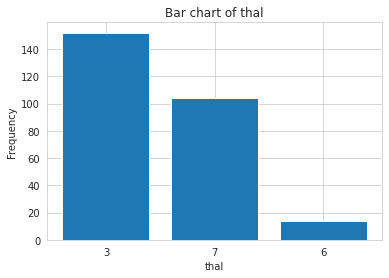

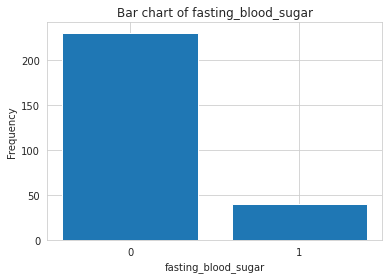

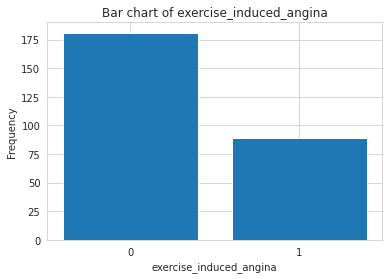

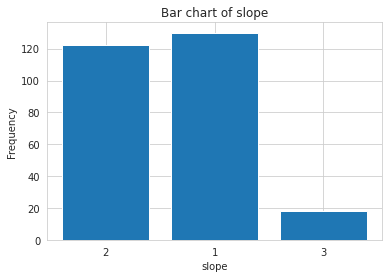

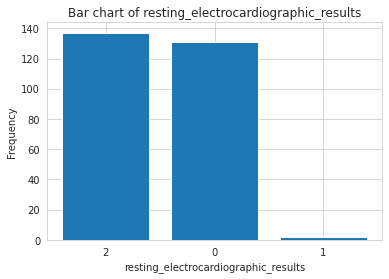

In [ ]:
#Bar Chart
for col in categorical_features:
  values = list(raw_data[col])
  x = raw_data[col].unique()
  y = [values.count(k) for k in x]
  plt.bar(x,y)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Bar chart of '+col)
  plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = raw_data[categorical_features+numerical_features]
y = raw_data['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state=0)
RF = RandomForestClassifier()
kfold = KFold(n_splits=5,random_state=0)
score = cross_val_score(RF,X_train,y_train,cv=kfold)
print("RandomForest      : %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForest      : 0.83 (+/- 0.13)


In [ ]:
RF.fit(X_train,y_train)
prediction = RF.predict(X_test)
print(RF.score(X_test,y_test))

0.7777777777777778
